# Usage (quick version)
This is a quick tour of CovsirPhy. Details of datasets and scenario analysis will be explained.

## Preparation
Prepare the packages.

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
import covsirphy as cs
cs.__version__

'2.10.0-eta.new.269.319.fix.307.309.refactor.291'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/



Detailed citaition list:
Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
Department of Disease Control of Thailand (2020), https://covid19.th-stat.com/
World Health Organization (2020), https://covid19.who.int
Ireland Health Protection Surveillance Centre (HPSC) and Health Service Executive (HSE) (2020), https://covid19ireland-geohive.hub.arcgis.com/
The COVID Tracking Project (2020), https://covidtracking.com
Ministry of Health of Croatia (2020), https://data.gov.hr/dataset/koronavirus/resource/08fab529-ebba-46c7-be79-05782ddb02ef
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Taiwan Ministry of Health and Welfare (2020), https://data.gov.tw/dataset/120451
National Institute for Public Health and the Environment of Netherlands (2020), https://data.rivm.nl/covid-19/
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Eng

### The number of cases (JHU style)
The main dataset is that of the number of cases. This includes "Confirmed", "Infected", "Recovered" and "Fatal". "Infected" was calculated as "Confirmed - Recovered - Fatal".

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


In [6]:
# Citation of COVID-19 Data Hub: this was shown when `DataLoader.jhu(verbose=True)
# print(data_loader.covid19dh_citation)

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
324760,2020-11-06,846,814,10,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
324761,2020-11-07,846,815,10,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
324762,2020-11-08,846,816,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
324763,2020-11-09,846,816,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
324764,2020-11-10,846,816,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
324760,2020-11-06,Colombia,Vichada,846,22,10,814
324761,2020-11-07,Colombia,Vichada,846,21,10,815
324762,2020-11-08,Colombia,Vichada,846,19,11,816
324763,2020-11-09,Colombia,Vichada,846,19,11,816
324764,2020-11-10,Colombia,Vichada,846,19,11,816


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
232,2020-11-06,32127,2051,461,29615
233,2020-11-07,32421,2121,461,29839
234,2020-11-08,32610,2173,461,29976
235,2020-11-09,32767,2278,462,30027
236,2020-11-10,33060,2416,465,30179


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-11-06,49406493,15748165,1246990,32411338,0.012620,0.328007,0.037048
2020-11-07,49916019,15957406,1254403,32704210,0.012565,0.327592,0.036939
2020-11-08,50479265,16275546,1260039,32943680,0.012481,0.326309,0.036839
2020-11-09,50949335,16506488,1266350,33176497,0.012428,0.325583,0.036767
2020-11-10,50955570,16511975,1266467,33177128,0.012427,0.325550,0.036769


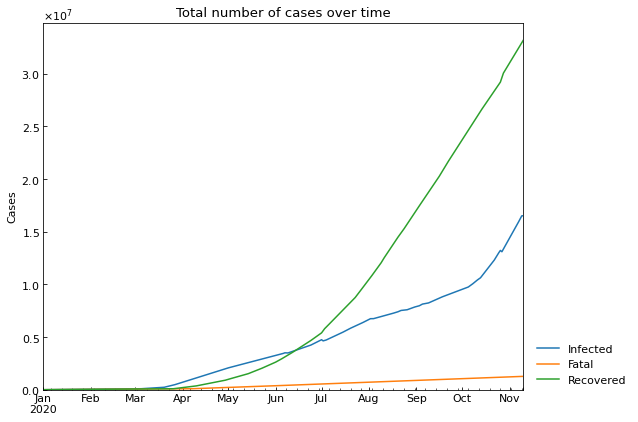

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan
If we have dataset for each country, we can use it optionally.

In [12]:
# Registered data in jhu_data
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
271,2020-11-06,106159,8606,1811,95742
272,2020-11-07,107490,9229,1816,96445
273,2020-11-08,108443,9439,1823,97181
274,2020-11-09,109225,9760,1835,97630
275,2020-11-10,110505,10405,1850,98250


In [13]:
# Download the dataset in Japan and show the citation
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan


In [14]:
# Replace the dataset for Japan
jhu_data.replace(japan_data)
# Show the new records in Japan
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
269,2020-11-06,104782,7220,1806,95756
270,2020-11-07,105914,7644,1809,96461
271,2020-11-08,107086,8077,1812,97197
272,2020-11-09,108084,8612,1818,97654
273,2020-11-10,108983,8880,1829,98274


### Population in each country
Population values are necessary to calculate the number of susceptible people. Susceptible is a variable of SIR-derived models.

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
324760,2020-11-06,846,814,10,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
324761,2020-11-07,846,815,10,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
324762,2020-11-08,846,816,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
324763,2020-11-09,846,816,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
324764,2020-11-10,846,816,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
274045,COL,Colombia,Vichada,2020-11-06,107808
274046,COL,Colombia,Vichada,2020-11-07,107808
274047,COL,Colombia,Vichada,2020-11-08,107808
274048,COL,Colombia,Vichada,2020-11-09,107808
274049,COL,Colombia,Vichada,2020-11-10,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)
This will be used in [Usage (details: policy measures)](https://lisphilar.github.io/covid19-sir/usage_policy.html).

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
324760,2020-11-06,846,814,10,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
324761,2020-11-07,846,815,10,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
324762,2020-11-08,846,816,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
324763,2020-11-09,846,816,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74
324764,2020-11-10,846,816,11,107808.0,COL,Vichada,Colombia,3,1,1,3,1,1,1,4,2,2,2,65.74


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
324760,2020-11-06,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,65.74
324761,2020-11-07,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,65.74
324762,2020-11-08,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,65.74
324763,2020-11-09,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,65.74
324764,2020-11-10,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,65.74


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
310,2020-11-06,1,1,1,0,0,1,1,3,2,2,1,38.89
311,2020-11-07,1,1,1,0,0,1,1,3,2,2,1,38.89
312,2020-11-08,1,1,1,0,0,1,1,3,2,2,1,38.89
313,2020-11-09,1,1,1,0,0,1,1,3,2,2,1,38.89
314,2020-11-10,1,1,1,0,0,1,1,3,2,2,1,38.89


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
310,2020-11-06,1,1,1,0,0,1,1,3,2,2,1,38.89
311,2020-11-07,1,1,1,0,0,1,1,3,2,2,1,38.89
312,2020-11-08,1,1,1,0,0,1,1,3,2,2,1,38.89
313,2020-11-09,1,1,1,0,0,1,1,3,2,2,1,38.89
314,2020-11-10,1,1,1,0,0,1,1,3,2,2,1,38.89


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
snl = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records
Let's see the records at first. `Scenario.records()` method return the records as a pandas dataframe and show a line plot.

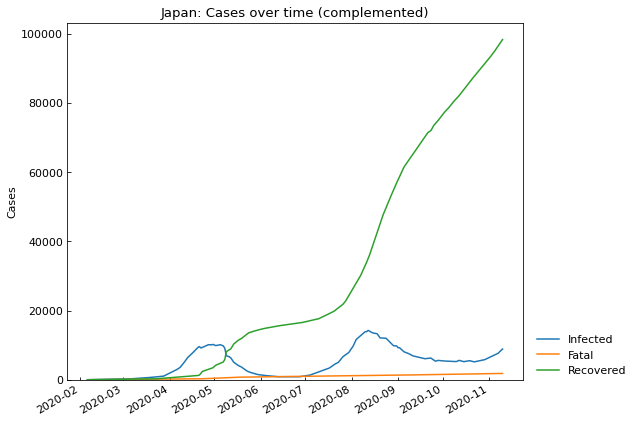

,Date,Confirmed,Infected,Fatal,Recovered
269,2020-11-06,104782,7220,1806,95756
270,2020-11-07,105914,7644,1809,96461
271,2020-11-08,107086,8077,1812,97197
272,2020-11-09,108084,8612,1818,97654
273,2020-11-10,108983,8880,1829,98274


In [26]:
record_df = snl.records()
record_df.tail()

### S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters. Details will be explained in [Usage (details: phases)](https://lisphilar.github.io/covid19-sir/usage_phases.html).

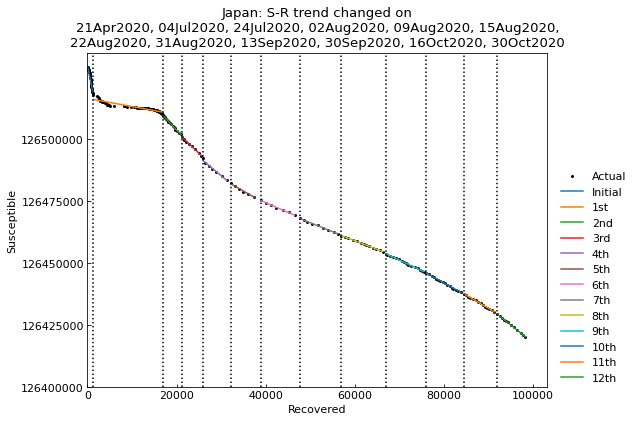

,Type,Start,End,Population
0th,Past,06Feb2020,20Apr2020,126529100
1st,Past,21Apr2020,03Jul2020,126529100
2nd,Past,04Jul2020,23Jul2020,126529100
3rd,Past,24Jul2020,01Aug2020,126529100
4th,Past,02Aug2020,08Aug2020,126529100
5th,Past,09Aug2020,14Aug2020,126529100
6th,Past,15Aug2020,21Aug2020,126529100
7th,Past,22Aug2020,30Aug2020,126529100
8th,Past,31Aug2020,12Sep2020,126529100
9th,Past,13Sep2020,29Sep2020,126529100


In [27]:
# Perform S-R trend analysis and set phases
snl.trend(set_phases=True)
snl.summary()

### Hyperparameter estimation of ODE models
Here, we will estimate the parameter values of SIR-derived models. As an example, we use SIR-F model. Details of models will be explained in [Usage (details: theoritical datasets)](https://lisphilar.github.io/covid19-sir/usage_theoretical.html).

In [28]:
# Estimate the parameter values of SIR-F model
snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	12th phase (30Oct2020 - 10Nov2020): finished  927 trials in 1 min  0 sec


	 3rd phase (24Jul2020 - 01Aug2020): finished  274 trials in 0 min 20 sec

	 0th phase (06Feb2020 - 20Apr2020): finished  751 trials in 1 min  0 sec

	 1st phase (21Apr2020 - 03Jul2020): finished  743 trials in 1 min  0 sec

	 2nd phase (04Jul2020 - 23Jul2020): finished  776 trials in 1 min  0 sec

	 7th phase (22Aug2020 - 30Aug2020): finished  151 trials in 0 min 10 sec

	 6th phase (15Aug2020 - 21Aug2020): finished  226 trials in 0 min 15 sec

	 4th phase (02Aug2020 - 08Aug2020): finished  788 trials in 1 min  0 sec

	 9th phase (13Sep2020 - 29Sep2020): finished  263 trials in 0 min 20 sec

	 8th phase (31Aug2020 - 12Sep2020): finished  403 trials in 0 min 30 sec

	 5th phase (09Aug2020 - 14Aug2020): finished  661 trials in 0 min 50 sec

	10th phase (30Sep2020 - 15Oct2020): finished  832 trials in 1 min  0 sec

	11th phase (16Oct2020 - 29Oct2020): finished  886 trials in 1 min  0 sec

Completed optimization. Total: 3 min 38 sec


In [29]:
# Show the sumamry of parameter estimation
snl.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/alpha2 [day],1/beta [day],alpha1 [-],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,06Feb2020,20Apr2020,126529100,SIR-F,4.61,0.021671,0.000113,0.105108,0.022180,1440,8833,9,0.022,45,0.275846,751,1 min 0 sec
1st,Past,21Apr2020,03Jul2020,126529100,SIR-F,0.41,0.104179,0.000159,0.030901,0.066628,1440,6281,32,0.104,15,0.233577,743,1 min 0 sec
2nd,Past,04Jul2020,23Jul2020,126529100,SIR-F,2.06,0.000551,0.000080,0.140735,0.068364,1440,12426,7,0.001,14,0.025050,776,1 min 0 sec
3rd,Past,24Jul2020,01Aug2020,126529100,SIR-F,1.84,0.000122,0.000158,0.133619,0.072347,1440,6318,7,0.000,13,0.017022,274,0 min 20 sec
4th,Past,02Aug2020,08Aug2020,126529100,SIR-F,1.78,0.000907,0.000406,0.117816,0.065583,1440,2462,8,0.001,15,0.029277,788,1 min 0 sec
5th,Past,09Aug2020,14Aug2020,126529100,SIR-F,1.13,0.000139,0.000248,0.082730,0.073185,1440,4029,12,0.000,13,0.013729,661,0 min 50 sec
6th,Past,15Aug2020,21Aug2020,126529100,SIR-F,0.78,0.001071,0.000531,0.078002,0.099974,1440,1883,12,0.001,10,0.016783,226,0 min 15 sec
7th,Past,22Aug2020,30Aug2020,126529100,SIR-F,0.83,0.001280,0.000751,0.079295,0.094984,1440,1331,12,0.001,10,0.024824,151,0 min 10 sec
8th,Past,31Aug2020,12Sep2020,126529100,SIR-F,0.68,0.000502,0.001356,0.070172,0.101445,1440,737,14,0.001,9,0.010279,403,0 min 30 sec
9th,Past,13Sep2020,29Sep2020,126529100,SIR-F,0.83,0.001120,0.001105,0.076205,0.090777,1440,905,13,0.001,11,0.019065,263,0 min 20 sec


### Accuracy of estimation

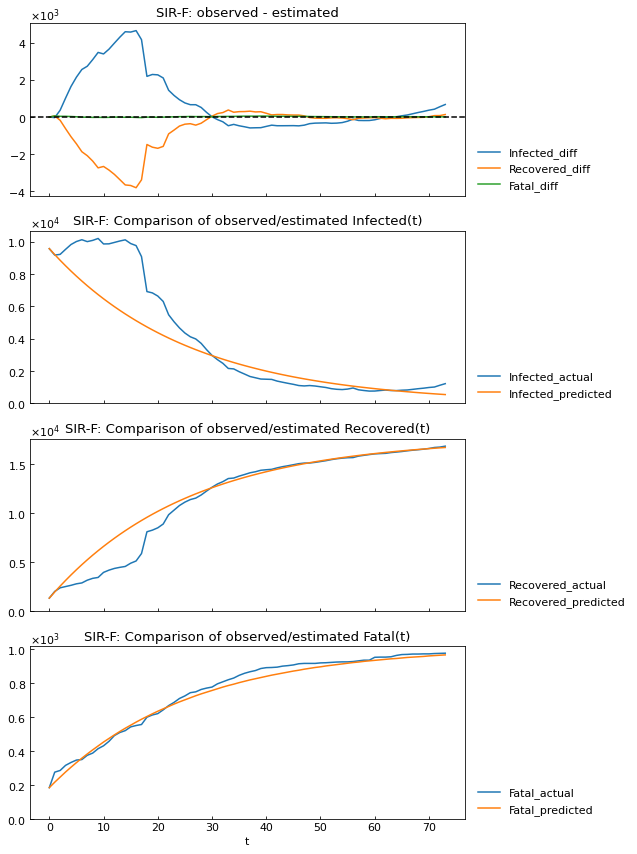

In [30]:
snl.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
snl.get("Rt", phase="4th")

1.78

### Show parameter history

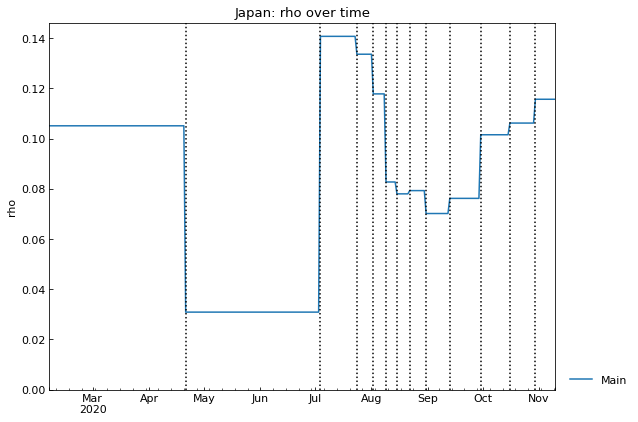

In [32]:
_ = snl.history(target="rho")

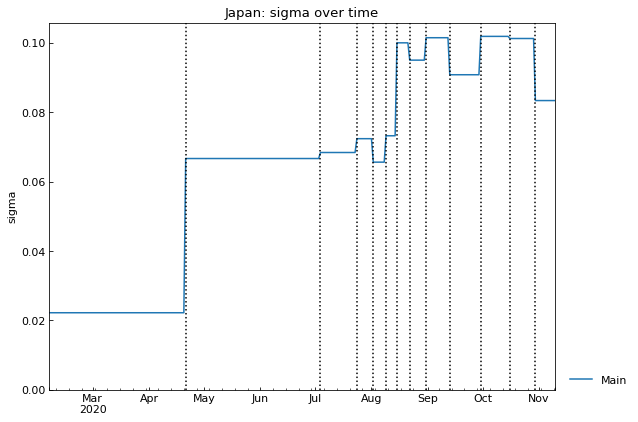

In [33]:
_ = snl.history(target="sigma")

### Show the history of reproduction number

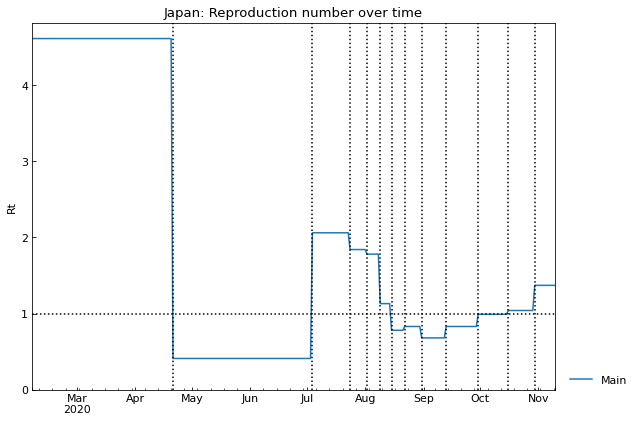

In [34]:
_ = snl.history(target="Rt")

### Simulate the number of cases

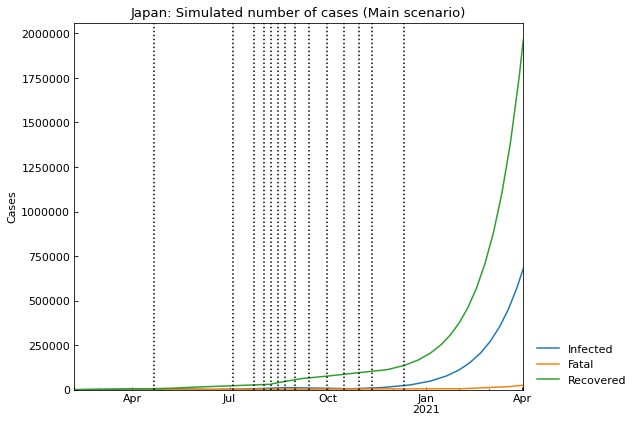

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,2376481,22486,605740,1748255
418,2021-03-30,2446265,23127,623633,1799505
419,2021-03-31,2518055,23787,642009,1852259
420,2021-04-01,2591900,24466,660881,1906553
421,2021-04-02,2667854,25165,680259,1962430


In [35]:
snl.clear(name="Main")
snl.add(days=30)
snl.add(end_date="01Apr2021", name="Main")
main_sim_df = snl.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [36]:
sigma_current = snl.get("sigma", name="Main", phase="last")
sigma_current

0.08333268961112007

In [37]:
sigma_new = sigma_current * 2
sigma_new

0.16666537922224015

In [38]:
snl.clear(name="Medicine")
snl.add(name="Medicine", days=30, sigma=sigma_current)
snl.add(name="Medicine", end_date="01Apr2021", sigma=sigma_new)
snl.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     0th      Past  06Feb2020  20Apr2020   126529100  SIR-F  4.61   
         1st      Past  21Apr2020  03Jul2020   126529100  SIR-F  0.41   
         2nd      Past  04Jul2020  23Jul2020   126529100  SIR-F  2.06   
         3rd      Past  24Jul2020  01Aug2020   126529100  SIR-F  1.84   
         4th      Past  02Aug2020  08Aug2020   126529100  SIR-F  1.78   
         5th      Past  09Aug2020  14Aug2020   126529100  SIR-F  1.13   
         6th      Past  15Aug2020  21Aug2020   126529100  SIR-F  0.78   
         7th      Past  22Aug2020  30Aug2020   126529100  SIR-F  0.83   
         8th      Past  31Aug2020  12Sep2020   126529100  SIR-F  0.68   
         9th      Past  13Sep2020  29Sep2020   126529100  SIR-F  0.83   
         10th     Past  30Sep2020  15Oct2020   126529100  SIR-F  0.99   
         11th     Past  16Oct2020  29Oct2020   126529100  SIR-F  1.04   
         12th     Past  30Oct2020  10Nov2020   126529100  SIR-F  1.37   
         13th   Future  11Nov2020  10Dec2020   126529100  SIR-F  1.37   
         14th   Future  11Dec2020  01Apr2021   126529100  SIR-F  1.37   
Medicine 0th      Past  06Feb2020  20Apr2020   126529100  SIR-F  4.61   
         1st      Past  21Apr2020  03Jul2020   126529100  SIR-F  0.41   
         2nd      Past  04Jul2020  23Jul2020   126529100  SIR-F  2.06   
         3rd      Past  24Jul2020  01Aug2020   126529100  SIR-F  1.84   
         4th      Past  02Aug2020  08Aug2020   126529100  SIR-F  1.78   
         5th      Past  09Aug2020  14Aug2020   126529100  SIR-F  1.13   
         6th      Past  15Aug2020  21Aug2020   126529100  SIR-F  0.78   
         7th      Past  22Aug2020  30Aug2020   126529100  SIR-F  0.83   
         8th      Past  31Aug2020  12Sep2020   126529100  SIR-F  0.68   
         9th      Past  13Sep2020  29Sep2020   126529100  SIR-F  0.83   
         10th     Past  30Sep2020  15Oct2020   126529100  SIR-F  0.99   
         11th     Past  16Oct2020  29Oct2020   126529100  SIR-F  1.04   
         12th     Past  30Oct2020  10Nov2020   126529100  SIR-F  1.37   
         13th   Future  11Nov2020  10Dec2020   126529100  SIR-F  1.37   
         14th   Future  11Dec2020  01Apr2021   126529100  SIR-F  0.69   

                   theta     kappa       rho     sigma   tau  1/alpha2 [day]  \
Scenario Phase                                                                 
Main     0th    0.021671  0.000113  0.105108  0.022180  1440            8833   
         1st    0.104179  0.000159  0.030901  0.066628  1440            6281   
         2nd    0.000551  0.000080  0.140735  0.068364  1440           12426   
         3rd    0.000122  0.000158  0.133619  0.072347  1440            6318   
         4th    0.000907  0.000406  0.117816  0.065583  1440            2462   
         5th    0.000139  0.000248  0.082730  0.073185  1440            4029   
         6th    0.001071  0.000531  0.078002  0.099974  1440            1883   
         7th    0.001280  0.000751  0.079295  0.094984  1440            1331   
         8th    0.000502  0.001356  0.070172  0.101445  1440             737   
         9th    0.001120  0.001105  0.076205  0.090777  1440             905   
         10th   0.000561  0.000902  0.101543  0.101833  1440            1108   
         11th   0.000874  0.001170  0.106197  0.101221  1440             854   
         12th   0.000737  0.000959  0.115679  0.083333  1440            1042   
         13th   0.000737  0.000959  0.115679  0.083333  1440            1042   
         14th   0.000737  0.000959  0.115679  0.083333  1440            1042   
Medicine 0th    0.021671  0.000113  0.105108  0.022180  1440            8833   
         1st    0.104179  0.000159  0.030901  0.066628  1440            6281   
         2nd    0.000551  0.000080  0.140735  0.068364  1440           12426   
         3rd    0.000122  0.000158  0.133619  0.072347  1440            6318   
 

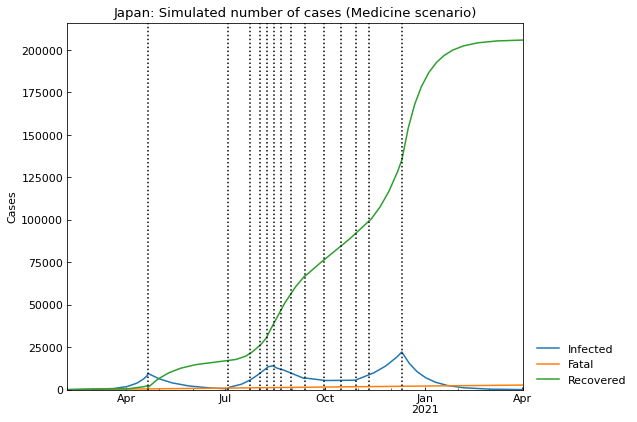

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,208603,2729,79,205795
418,2021-03-30,208611,2729,75,205807
419,2021-03-31,208622,2730,72,205820
420,2021-04-01,208629,2730,68,205831
421,2021-04-02,208636,2730,64,205842


In [39]:
snl.simulate(name="Medicine").tail()

### Compare the scenarios
We will compare the scenarios with representative values, reproduction number and parameter values.

In [40]:
snl.describe()

,max(Infected),argmax(Infected),Confirmed on 02Apr2021,Infected on 02Apr2021,Fatal on 02Apr2021,14th_Rt
Main,680259,02Apr2021,2667854,680259,25165,1.37
Medicine,22192,11Dec2020,208636,64,2730,0.69


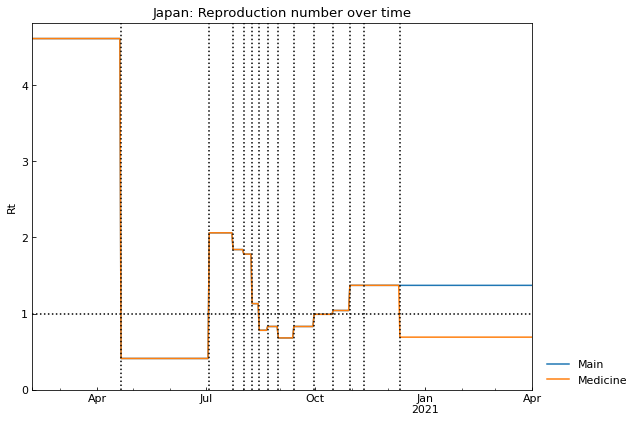

In [41]:
_ = snl.history(target="Rt")

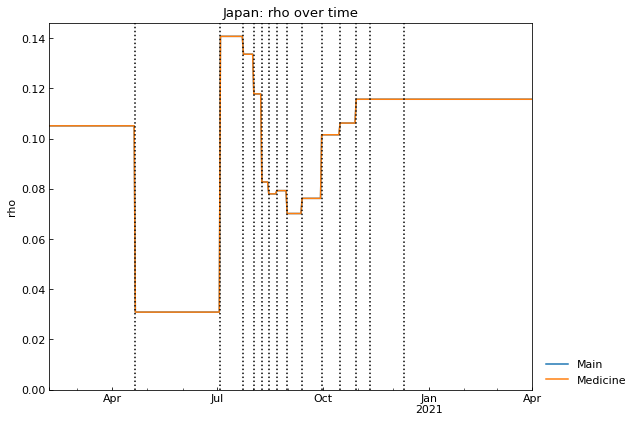

In [42]:
_ = snl.history(target="rho")

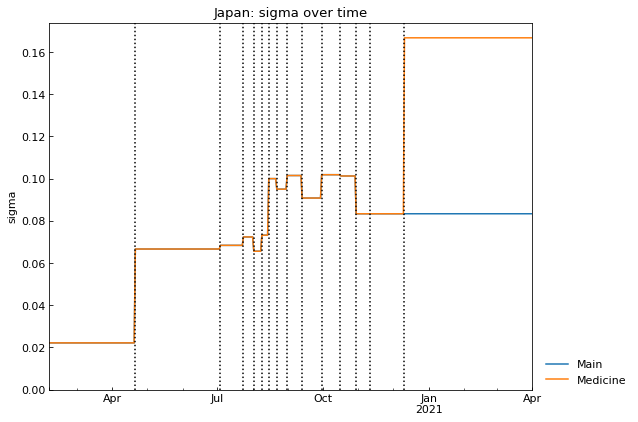

In [43]:
_ = snl.history(target="sigma")

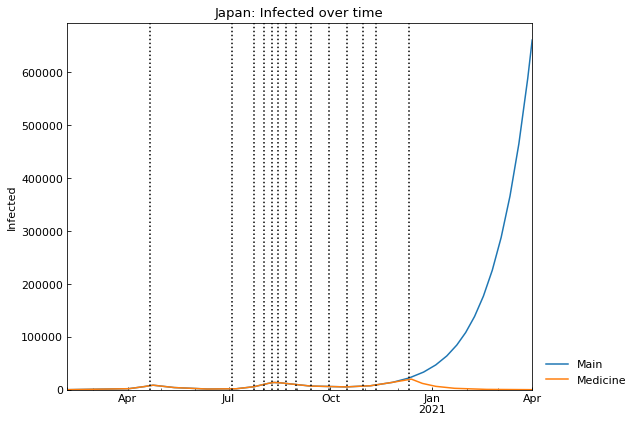

In [44]:
_ = snl.history(target="Infected")

### Change rate of parameters in main scenario
History of each parameter will be shown. Values will be divided by the values in 0th phase.

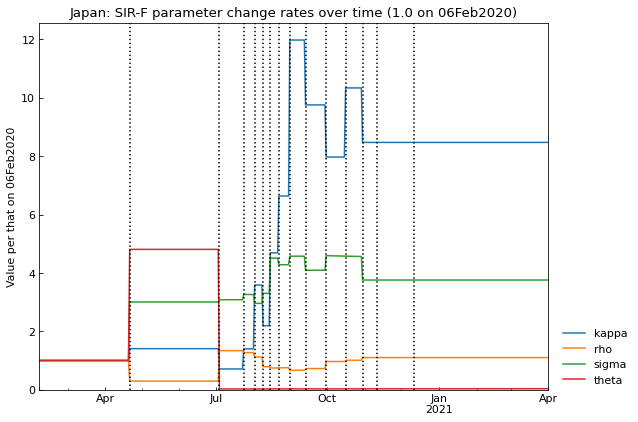

In [45]:
_ = snl.history_rate(name="Main")

## Retrospective analysis
We can evaluate the impact of measures using past records. How many people were infected if the parameter values have not changed sinse 01Sep2020?

In [46]:
# Perform retrospective analysis
snl_retro = cs.Scenario(jhu_data, population_data, "Japan")
snl_retro.retrospective("01Sep2020", model=cs.SIRF, control="Main", target="Retrospective")


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	12th phase (30Oct2020 - 10Nov2020): finished  838 trials in 1 min  0 sec


	 2nd phase (04Jul2020 - 23Jul2020): finished  777 trials in 1 min  0 sec

	 1st phase (21Apr2020 - 03Jul2020): finished  721 trials in 1 min  0 sec

	 3rd phase (24Jul2020 - 01Aug2020): finished  784 trials in 1 min  0 sec

	 0th phase (06Feb2020 - 20Apr2020): finished  730 trials in 1 min  0 sec

	 4th phase (02Aug2020 - 08Aug2020): finished  146 trials in 0 min 10 sec

	 6th phase (15Aug2020 - 21Aug2020): finished  144 trials in 0 min 10 sec

	 7th phase (22Aug2020 - 30Aug2020): finished  149 trials in 0 min 10 sec

	 8th phase (31Aug2020 - 12Sep2020): finished  216 trials in 0 min 15 sec

	 9th phase (13Sep2020 - 29Sep2020): finished  411 trials in 0 min 30 sec

	 5th phase (09Aug2020 - 14Aug2020): finished  679 trials in 0 min 50 sec

	10th phase (30Sep2020 - 15Oct2020): finished  836 trials in 1 min  0 sec

	11th phase (16Oct2020 - 29Oct2020): finished  913 trials in 1 min  0 sec

Completed optimization. Total: 3 min 28 sec



<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 8th phase (31Aug2020 - 10Nov2020): finished 1900 trials in 1 min  0 sec

Completed optimization. Total: 1 min  0 sec


In [47]:
# Show the summary of estimation
cols = ["Start", "End", "ODE", "Rt", *cs.SIRF.PARAMETERS] + ["RMSLE", "Trials", "Runtime"]
snl_retro.summary(columns=cols)

Start        End    ODE    Rt     theta     kappa  \
Scenario      Phase                                                          
Main          0th    06Feb2020  20Apr2020  SIR-F  5.24  0.000223  0.000566   
              1st    21Apr2020  03Jul2020  SIR-F  0.37  0.036986  0.000527   
              2nd    04Jul2020  23Jul2020  SIR-F  2.01  0.000066  0.000153   
              3rd    24Jul2020  01Aug2020  SIR-F  1.93  0.000966  0.000117   
              4th    02Aug2020  08Aug2020  SIR-F  1.63  0.001278  0.000079   
              5th    09Aug2020  14Aug2020  SIR-F  1.12  0.000966  0.000117   
              6th    15Aug2020  21Aug2020  SIR-F  0.74  0.005474  0.000093   
              7th    22Aug2020  30Aug2020  SIR-F  0.75  0.005474  0.000093   
              8th    31Aug2020  12Sep2020  SIR-F  0.68  0.003406  0.000301   
              9th    13Sep2020  29Sep2020  SIR-F  0.83  0.000660  0.000284   
              10th   30Sep2020  15Oct2020  SIR-F  0.99  0.000110  0.000231   
              11th   16Oct2020  29Oct2020  SIR-F  1.03  0.001077  0.000233   
              12th   30Oct2020  10Nov2020  SIR-F  1.41  0.000051  0.000272   
Retrospective 0th    06Feb2020  20Apr2020  SIR-F  5.24  0.000223  0.000566   
              1st    21Apr2020  03Jul2020  SIR-F  0.37  0.036986  0.000527   
              2nd    04Jul2020  23Jul2020  SIR-F  2.01  0.000066  0.000153   
              3rd    24Jul2020  01Aug2020  SIR-F  1.93  0.000966  0.000117   
              4th    02Aug2020  08Aug2020  SIR-F  1.63  0.001278  0.000079   
              5th    09Aug2020  14Aug2020  SIR-F  1.12  0.000966  0.000117   
              6th    15Aug2020  21Aug2020  SIR-F  0.74  0.005474  0.000093   
              7th    22Aug2020  30Aug2020  SIR-F  0.75  0.005474  0.000093   
              8th    31Aug2020  10Nov2020  SIR-F  0.75  0.005474  0.000093   

                          rho     sigma     RMSLE  Trials       Runtime  
Scenario      Phase                                                      
Main          0th    0.020398  0.003324  0.313201     730  1 min  0 sec  
              1st    0.004813  0.011858  0.225549     721  1 min  0 sec  
              2nd    0.027947  0.013746  0.030137     777  1 min  0 sec  
              3rd    0.027371  0.014086  0.024610     784  1 min  0 sec  
              4th    0.023867  0.014538  0.034231     146  0 min 10 sec  
              5th    0.016810  0.014892  0.013959     679  0 min 50 sec  
              6th    0.016128  0.021554  0.025284     144  0 min 10 sec  
              7th    0.016979  0.022317  0.020709     149  0 min 10 sec  
              8th    0.014121  0.020246  0.012007     216  0 min 15 sec  
              9th    0.016537  0.019687  0.023209     411  0 min 30 sec  
              10th   0.019337  0.019222  0.011997     836  1 min  0 sec  
              11th   0.019468  0.018687  0.017663     913  1 min  0 sec  
              12th   0.021410  0.014868  0.016749     838  1 min  0 sec  
Retrospective 0th    0.020398  0.003324  0.313201     730  1 min  0 sec  
              1st    0.004813  0.011858  0.225549     721  1 min  0 sec  
              2nd    0.027947  0.013746  0.030137     777  1 min  0 sec  
              3rd    0.027371  0.014086  0.024610     784  1 min  0 sec  
              4th    0.023867  0.014538  0.034231     146  0 min 10 sec  
              5th    0.016810  0.014892  0.013959     679  0 min 50 sec  
              6th    0.016128  0.021554  0.025284     144  0 min 10 sec  
              7th    0.016979  0.022317  0.020709     149  0 min 10 sec  
              8th    0.016979  0.022317  0.441920    1900  1 min  0 sec

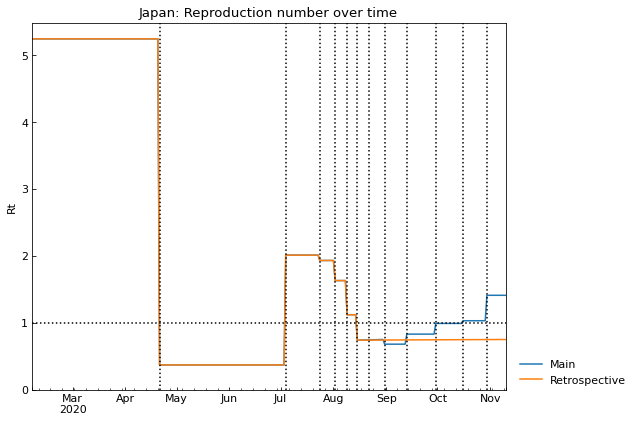

In [48]:
# History of reproduction number
_ = snl_retro.history("Rt")

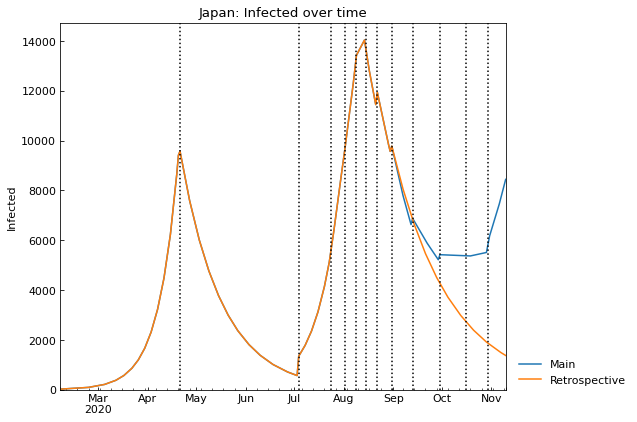

In [49]:
# History of Infected
_ = snl_retro.history("Infected")

In [50]:
# Show the representative values
snl_retro.describe()

,max(Infected),argmax(Infected),Confirmed on 11Nov2020,Infected on 11Nov2020,Fatal on 11Nov2020,8th_Rt,9th_Rt,10th_Rt,11th_Rt,12th_Rt
Main,14041,14Aug2020,108948,8713,1863,0.68,0.83,0.99,1.03,1.41
Retrospective,14041,14Aug2020,93766,1336,1563,0.75,-,-,-,-
